# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Pedro Oliveira de Azambuja</font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [198]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import scipy.stats

In [199]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv',sep=",")
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [200]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [201]:

#Criando Coluna "Valor"
df.loc[df.Latitude<0,"Hemisfério"] = "Sul"
df.loc[df.Latitude>0,"Hemisfério"] = "Norte"




## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

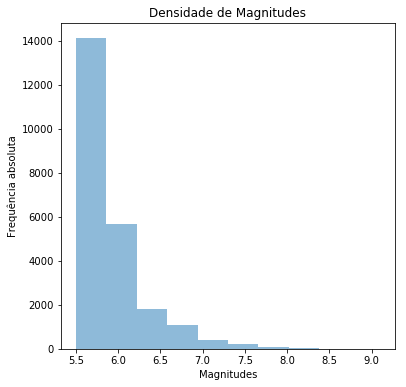

In [202]:
plot = df.Magnitude.plot.hist(title="Densidade de Magnitudes",figsize =(6,6),alpha=0.5)
plt.ylabel("Frequência absoluta")
plt.xlabel("Magnitudes")

##### Esse histograma fornece a relação entre a frequência absoluta de ocorrências de abalos ordenados em faixas de magnitudes

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [203]:
mu, sigma = expon.fit(df["Magnitude"])
print(mu, sigma)

5.49999999967 0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

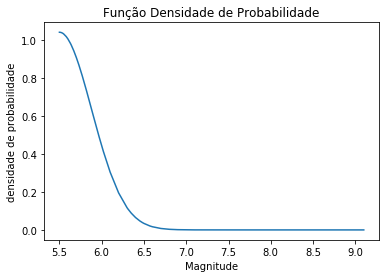

In [204]:
plt.plot(sorted(df["Magnitude"]),scipy.stats.norm.pdf(sorted(df["Magnitude"]),loc = mu, scale=sigma))
plt.xlabel('Magnitude')
plt.ylabel('densidade de probabilidade')
plt.title('Função Densidade de Probabilidade')


###### Essa curva fornece a densidade de probabilidade da ocorrência de abalos organizados pela Magnitude. A área abaxo da curva é igual a 1.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [205]:

tabela = pd.crosstab(df.Hemisfério,df.Type,normalize = True,margins=True)
tabela

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,0.447140,0.000085,0.006279,0.000000,0.453505
Sul,0.545171,0.000085,0.001196,0.000043,0.546495
All,0.992311,0.000171,0.007475,0.000043,1.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [206]:
P_norte = tabela.iat[0,0]/tabela.iat[2,0]
P_norte
print("A probabilidade de ocorrer um terremoto no hemisfério norte é de: {0}%".format(P_norte*100))

A probabilidade de ocorrer um terremoto no hemisfério norte é de: 45.06047953166028%


Explique o seu raciocínio

##### Com a equação acima, estou dividindo a frequência de terremotos no hemisfério norte pela frequência total de terremotos

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [207]:
P_norte_nuclear = tabela.iat[0,2]/tabela.iat[0,4]
P_norte_nuclear
print("A probabilidade de ter sido uma explosão nuclear é de: {0}%".format(P_norte_nuclear*100))

A probabilidade de ter sido uma explosão nuclear é de: 1.3845719129697656%


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

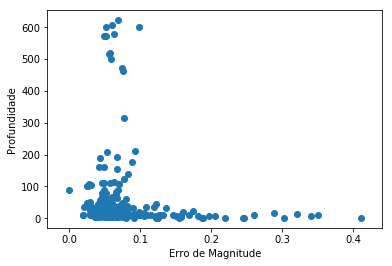

In [208]:

plt.scatter(df['Magnitude Error'],df["Depth"])
plt.xlabel("Erro de Magnitude")
plt.ylabel("Profundidade")


Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [209]:
df["Magnitude Error"].corr(df["Depth"])

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

O valor da correlação encontrado indica que a relação entre essas duas variáveis é praticamente inexistente, ou seja , o erro de Magnitude não é influenciado pela profundidade.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64


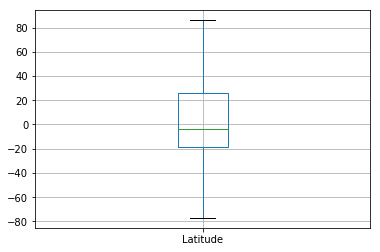

In [210]:
print(df.Latitude.describe())
df.boxplot(column="Latitude")

### Describe
##### mean:é a latitude média de todas as latitues analisadas; min: é o valor mínimo para o qual ocorreu abalo sísmico; max: valor máximo de latitude em que ocorreu abalo sísmico; std: desvio padrão médio(quanto as variáveis divergem do valor médio); 25%: significa que 25% das latitudes em que ocorreram abalos sísmicos estão abaixo de -30.9117; ( e a mesma lógica para os outros valores).
### Boxplot
##### o Valor de 25% se encontra no lado inferior do retângulo, o de 50% na barra verde e o de 75% no lado superior do retângulo.

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


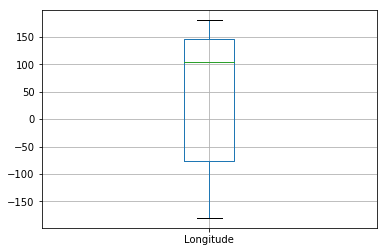

In [211]:
print(df.Longitude.describe())
df.boxplot(column="Longitude")

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [216]:
#Encontrando valores para o hemisfério Norte
df_norte = df[df.Hemisfério == "Norte"]
tabela_n = pd.crosstab(df_norte["Type"],df_norte["Magnitude Type"],normalize=True)
tabela_n


Magnitude Type,MB,MD,MH,ML,MS,MW,MWB,MWC,MWR,MWW
Type,,,,,,,,,,
Earthquake,0.145751,0.000565,0.000471,0.006124,0.072169,0.347089,0.104767,0.22508,0.001131,0.082815
Explosion,0.000188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Nuclear Explosion,0.012719,0.000000,0.000000,0.001131,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [215]:
# Encontrando valores para o hemisfério Sul
df_sul = df[df.Hemisfério == "Sul"]
tabela_s = pd.crosstab(df_sul["Type"],df_sul["Magnitude Type"],normalize = True)
tabela_s

Magnitude Type,MB,MS,MW,MWB,MWC,MWR,MWW
Type,,,,,,,
Earthquake,0.159997,0.073081,0.315617,0.105206,0.256292,0.001094,0.08629
Explosion,0.000156,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Nuclear Explosion,0.002189,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Rock Burst,0.000000,0.000000,0.000000,0.000000,0.000078,0.000000,0.00000


In [236]:
#Encontrando P(MB&NE/norte)
P_norte = tabela_n.iat[2,0] #P(MB&NE) a tabela ja filtrou a condição do norte
P_norte

#Encontrando P(MB&NE/sul)
P_sul = tabela_s.iat[2,0] #P(MB&NE) a tabela ja filtrou a condição do sul
P_sul


print("A probabilidade de ocorrer abalos do tipo MB e Nuclear explosion:\nno norte é : {0}%\ne no sul: {1}%".format((P_norte*100),(P_sul*100)))










A probabilidade de ocorrer abalos do tipo MB e Nuclear explosion:
no norte é : 1.2719050310910118%
e no sul: 0.21885258715022668%


#### Logo, é mais provável que tenha sido no Norte.